In [1]:
from pandas_datareader import data
import datetime
import numpy as np
from pandas_datareader import DataReader
from bokeh.plotting import figure, show , output_file
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
tech_list = ['AAPL']

In [3]:
# set up Start and End time for data grab
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2021,4,28)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    

In [4]:
AAPL.info

<bound method DataFrame.info of                   High         Low        Open       Close       Volume  \
Date                                                                      
2020-12-31  134.740005  131.720001  134.080002  132.690002   99116600.0   
2021-01-04  133.610001  126.760002  133.520004  129.410004  143301900.0   
2021-01-05  131.740005  128.429993  128.889999  131.009995   97664900.0   
2021-01-06  131.050003  126.379997  127.720001  126.599998  155088000.0   
2021-01-07  131.630005  127.860001  128.360001  130.919998  109578200.0   
...                ...         ...         ...         ...          ...   
2021-04-22  134.149994  131.410004  133.039993  131.940002   84566500.0   
2021-04-23  135.119995  132.160004  132.160004  134.320007   78657500.0   
2021-04-26  135.059998  133.559998  134.830002  134.720001   66905100.0   
2021-04-27  135.410004  134.110001  135.009995  134.389999   66015800.0   
2021-04-28  135.020004  133.080002  134.309998  133.580002  10776010

In [5]:
AAPL.head(81)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.267349
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.997803
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.592697
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.196747
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.502991
...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.716278
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.092239
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562


In [6]:
# Summery stats for Apple Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,81.000000,81.000000,81.000000,81.000000,8.100000e+01,81.000000
mean,130.737038,127.586914,129.337161,129.205679,1.043527e+08,128.927723
std,6.174510,6.136200,6.244717,6.265566,2.817729e+07,6.214226
min,120.400002,116.209999,119.029999,116.360001,6.014510e+07,116.162689
25%,125.559998,121.839996,123.750000,123.389999,8.722280e+07,123.180771
50%,131.050003,128.490005,128.949997,129.869995,9.766490e+07,129.649780
75%,135.380005,133.080002,134.309998,134.160004,1.129663e+08,133.932510
max,145.089996,141.369995,143.600006,143.160004,1.855495e+08,142.704010


In [7]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2020-12-31 to 2021-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       81 non-null     float64
 1   Low        81 non-null     float64
 2   Open       81 non-null     float64
 3   Close      81 non-null     float64
 4   Volume     81 non-null     float64
 5   Adj Close  81 non-null     float64
dtypes: float64(6)
memory usage: 4.4 KB


In [8]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

In [9]:
closingprice_df.head(81)

Symbols,AAPL
Date,
2020-12-31,132.690002
2021-01-04,129.410004
2021-01-05,131.009995
2021-01-06,126.599998
2021-01-07,130.919998
...,...
2021-04-22,131.940002
2021-04-23,134.320007
2021-04-26,134.720001


In [10]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [11]:
tech_returns.head(81)

Symbols,AAPL
Date,
2020-12-31,NaN
2021-01-04,-0.024719
2021-01-05,0.012364
2021-01-06,-0.033662
2021-01-07,0.034123
...,...
2021-04-22,-0.011685
2021-04-23,0.018039
2021-04-26,0.002978


# Risk Analysis

In [12]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [13]:
rets.head(80)

Symbols,AAPL
Date,
2021-01-04,-0.024719
2021-01-05,0.012364
2021-01-06,-0.033662
2021-01-07,0.034123
2021-01-08,0.008631
...,...
2021-04-22,-0.011685
2021-04-23,0.018039
2021-04-26,0.002978


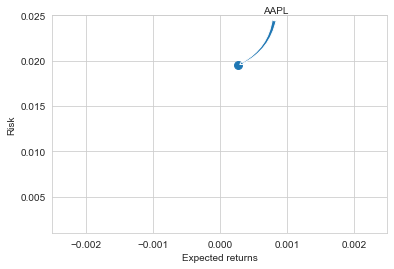

In [14]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

C:\Users\ababh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

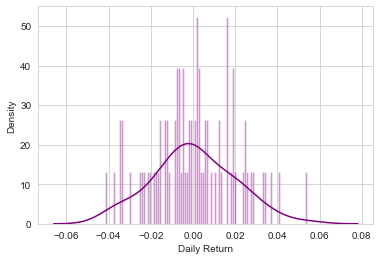

In [15]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [16]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.03394899860803014

# Prediction

In [17]:
# For Apple Stock - AAPL
AAPL.head(81)

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.267349,NaN
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.997803,-0.024719
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.592697,0.012364
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.196747,-0.033662
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.502991,0.034123
...,...,...,...,...,...,...,...
2021-04-22,134.149994,131.410004,133.039993,131.940002,84566500.0,131.716278,-0.011685
2021-04-23,135.119995,132.160004,132.160004,134.320007,78657500.0,134.092239,0.018039
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562,0.002978


In [27]:
rets.head()

Symbols,AAPL
Date,
2021-01-04,-0.024719
2021-01-05,0.012364
2021-01-06,-0.033662
2021-01-07,0.034123
2021-01-08,0.008631


In [28]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days
# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['AAPL']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['AAPL']

In [29]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

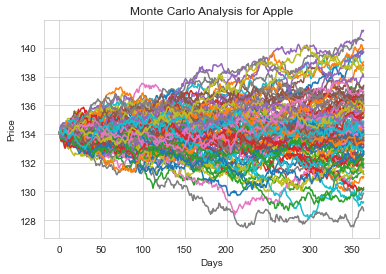

In [31]:
start_price = 134.080002

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

In [32]:
# For Apple Stock Price
start_price = 134.080002

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Apple Stock(AAPL) after 365 days')

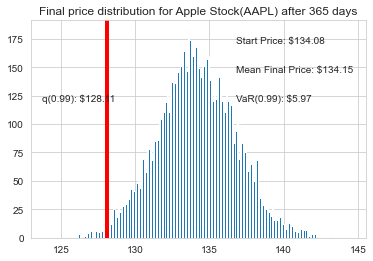

In [39]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for Apple Stock(AAPL) after 365 days")